### Author: Md Fahim Hasan
### Work Email: mdfahim.hasan@bayer.com

# Read Me

In this script, we explore correlation between TWC and ERA5 datasets. One of the key goals of our model framework is to use ERA5 datasets as input variables and TWC datasets as target/training data to improve resolution of weather datasets. Some variables of interest are `max temperature`, `min temperature`, `average relative humidity`, and `average wind speed`. These variables have estimates in both ERA5 and TWC datasets. In this script we will plot some of these variables together to discover if there are any correlation between ERA5 and TWC estimates, for example, if there is any correlation betwwen ERA5 and TWC maximum temperature. 

Note that, for comparing ERA5 and TWC variables, the ERA5 dataset was resampled to 4km resolution because TWC dataset is also of 4km resolution. Them R2 values were estimated. For ERA5 and SMAP L-band soil moisture data comparison, ERA5 soil moisture data was resampled to 100m resolution as SMAp soil moisture data is of 100m spatial resolution. We have used `Biliner Resampling` for resampling the datasets from low to high resolution. Look into `Discussion.ipynb` script for detail 

The script consists of following sections-

## 1. Correlation between TWC and ERA5 `Max Temperature`

Here, we will try to see if there is any correlation between TWC and ERA5 max temperature data for some random dates. For plotting the ERA5 values with TWC 4km resolution data, ERA5 dataset has been resampled to 4km resolution using `Biliner Resampling`.

Some positive R2 value between TWC and ERA5 maximum temperature were found. This seems promising for ML/DL modeling.


## 2. Correlation between TWC and ERA5 `Total Precipitation`

Here, we will try to see if there is any correlation between TWC and ERA5 total precipitation data for some random dates. 

Based on the scatter plots of TWC and ERA5 `total_precipitation`, it seems like ERA5 and TWC total_precipitation don't have good R2 correlation, meaning the ML framework using ERA5 precip as predictors and TWC precip as training data might not work well.



## 3. Correlation between TWC and ERA5 `Average Wind Speed`

Here, we will try to see if there is any correlation between TWC and ERA5 average wind speed data for some random dates. For plotting the ERA5 values with TWC 4km resolution data, ERA5 dataset has been resampled to 4km resolution using `Biliner Resampling`.

We found mostly negative R2 value between TWC and ERA5 average wind speed. Still, it is worth investigating whether ML/DL model can improve this correlation by increasing spatial resolution (improving values) of ERA5 average wind speed data.


## 4. Correlation between TWC and ERA5 `Average Relative Humidity`

Here, we will try to see if there is any correlation between TWC and ERA5 Average Relative Humidity data for some random dates.  For plotting the ERA5 values with TWC 4km resolution data, ERA5 dataset has been resampled to 4km resolution using `Biliner Resampling`.

We found some positive R2 value between TWC and ERA5 average relative humidity. This seems promising for ML/DL modeling.


## 5. Comparing ERA5 and SMAP L-band soil moisute data

In the framework, we didn't include 100m resolution SMAP L-band satellite soil moisture data due to data issue. The SMAP L-band satellite soil moisture data plotted here are only for 2022. Later when `Feng` gave me the SMAP L-band satellite soil moisture datasets from 2017, there were data issues in both soil moisture and land surface temperature data (detail discussion in `Exp_DA_satellite_data.ipynb` script). We could only use the land surface temperature data in the `100m ARD`. For plotting the ERA5 values with satellite 100m resolution data, the ERA5 dataset has been maked and resampled to 100m resolution using `Biliner Resampling`.

This comparison is only performed for `Woodland site` as satellite soil moisture data is only available for Woodland site in our ROI for the time being.

The scatter plots show no correlation between ERA5 soil mositure and satellite SMAP L-Band soil moisture datasets. With varying values of satellite soil moisture, the ERA5 soil moisture values remain nearly the same.

---------------

In [5]:
import os
import numpy as np
import pandas as pd
from glob import glob
import geopandas as gpd
from rasterio.plot import show
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from ipynb.fs.full.process_utils import *

### Checking if all TWC and ERA5 data were processes (rasterized and resampled)

In [6]:
era5_datasets = '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear'

for each_folder in os.listdir(era5_datasets):
    folder_path = os.path.join(era5_datasets, each_folder)
    print(f'Number of tif files in {each_folder}:', len(glob(os.path.join(folder_path, '*.tif'))))

Number of tif files in min_dew_temp: 2328
Number of tif files in MaxNet_SR: 2328
Number of tif files in MaxDown_SR: 2328
Number of tif files in avg_SM_L3: 2328
Number of tif files in total_precip: 2328
Number of tif files in lon: 1
Number of tif files in TotNet_SR: 2328
Number of tif files in avg_Rhumid: 2328
Number of tif files in avg_ST_L1: 2328
Number of tif files in min_wind_speed: 2328
Number of tif files in avg_SM_L2: 2328
Number of tif files in avg_ST_L2: 2328
Number of tif files in max_Rhumid: 2328
Number of tif files in avg_atmPress: 2328
Number of tif files in max_dew_temp: 2328
Number of tif files in avg_dew_temp: 2328
Number of tif files in avg_ST_L4: 2328
Number of tif files in min_atmPress: 2328
Number of tif files in eto: 2328
Number of tif files in avg_wind_dir: 2328
Number of tif files in min_temp: 2328
Number of tif files in avg_wind_speed: 2328
Number of tif files in lat: 1
Number of tif files in TotDown_SR: 2328
Number of tif files in etr: 2328
Number of tif files i

In [8]:
twc_datasets = '../../datasets/weather_raster_data/counties_California/twc_data'

for each_folder in os.listdir(twc_datasets):
    folder_path = os.path.join(twc_datasets, each_folder)
    print(f'Number of tif files in {each_folder}:', len(glob(os.path.join(folder_path, '*.tif'))))

Number of tif files in MaxDown_SR: 881
Number of tif files in total_precip: 881
Number of tif files in lon: 881
Number of tif files in avg_Rhumid: 881
Number of tif files in avg_atmPress: 881
Number of tif files in min_temp: 881
Number of tif files in lat: 881
Number of tif files in avg_wind: 881
Number of tif files in TotDown_SR: 881
Number of tif files in max_temp: 881
Number of tif files in avg_Cloud: 881


# 1. Correlation between TWC and ERA5 `Max Temperature`

Here, we will try to see if there is any correlation between TWC and ERA5 max temperature data for some random dates.  For plotting the ERA5 values with TWC 4km resolution data, ERA5 dataset has been resampled to 4km resolution using `Biliner Resampling`.


#### unit deg C

#### TWC Max Temperature

In [13]:
twc_max_temp_datasets = glob(os.path.join('../../datasets/weather_raster_data/counties_California/twc_data/max_temp', '*tif'))
# randomized_twc_max_temp = np.random.choice(twc_max_temp_datasets, size=9) # choosing #n daasets randomly 
selected_twc_max_temp = ['../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20210322.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20210902.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20230326.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20210411.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20210210.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20221124.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20220602.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20210407.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20210506.tif']
selected_twc_max_temp

['../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20210322.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20210902.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20230326.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20210411.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20210210.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20221124.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20220602.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20210407.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/max_temp/max_temp_20210506.tif']

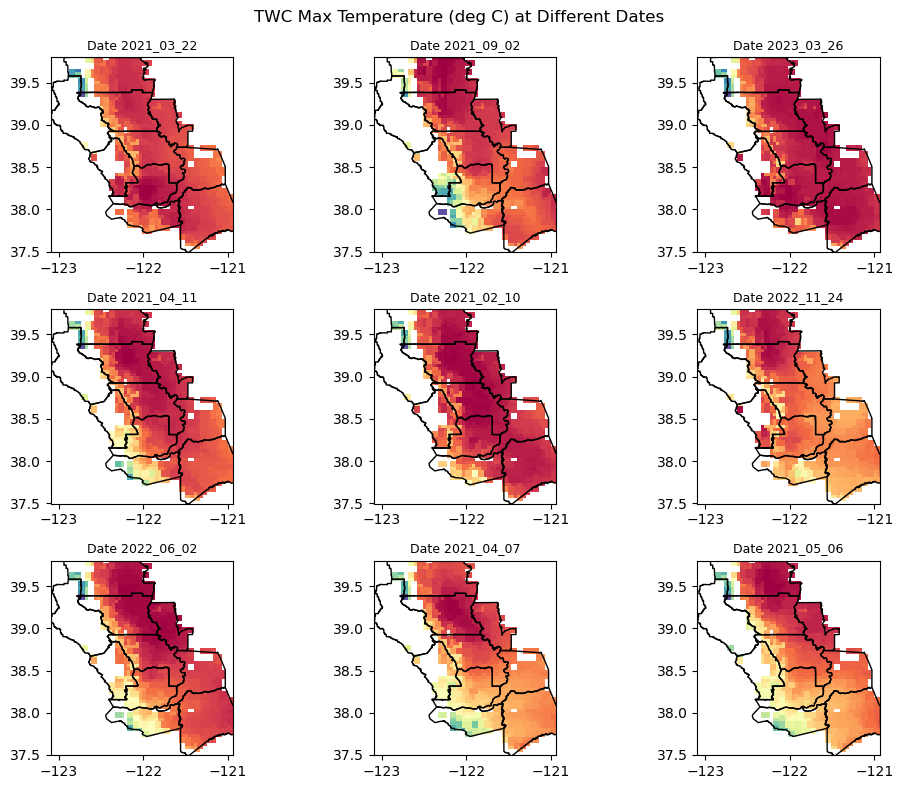

In [15]:
plot_dated_images_rasters(list_of_images=list(selected_twc_max_temp), num_cols=3, figsize=(10, 8), 
            shapefile='../shapefiles_grids/selected_counties_California.shp', title='TWC Max Temperature (deg C) at Different Dates')

### ERA5 Max Temperature (bilinear)

In [16]:
selected_era5_max_temp_bilinear = ['../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/max_temp/max_temp_20210322.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/max_temp/max_temp_20210902.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/max_temp/max_temp_20230326.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/max_temp/max_temp_20210411.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/max_temp/max_temp_20210210.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/max_temp/max_temp_20221124.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/max_temp/max_temp_20220602.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/max_temp/max_temp_20210407.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/max_temp/max_temp_20210506.tif']

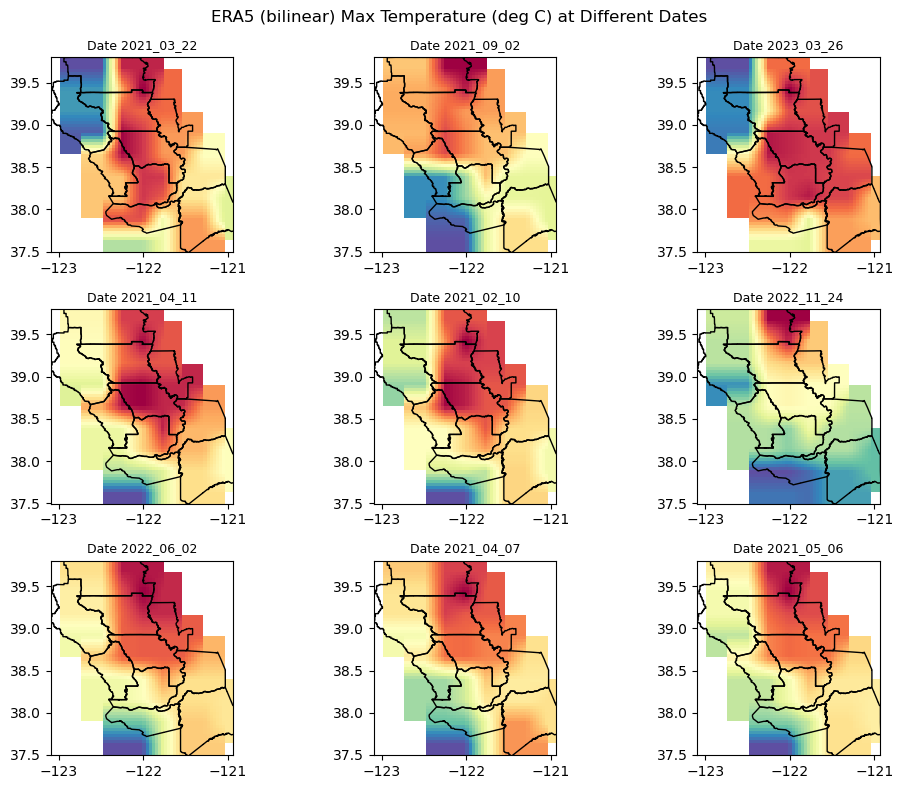

In [17]:
plot_dated_images_rasters(list_of_images=list(selected_era5_max_temp_bilinear), num_cols=3, figsize=(10, 8), 
            shapefile='../shapefiles_grids/selected_counties_California.shp', title='ERA5 (bilinear) Max Temperature (deg C) at Different Dates')

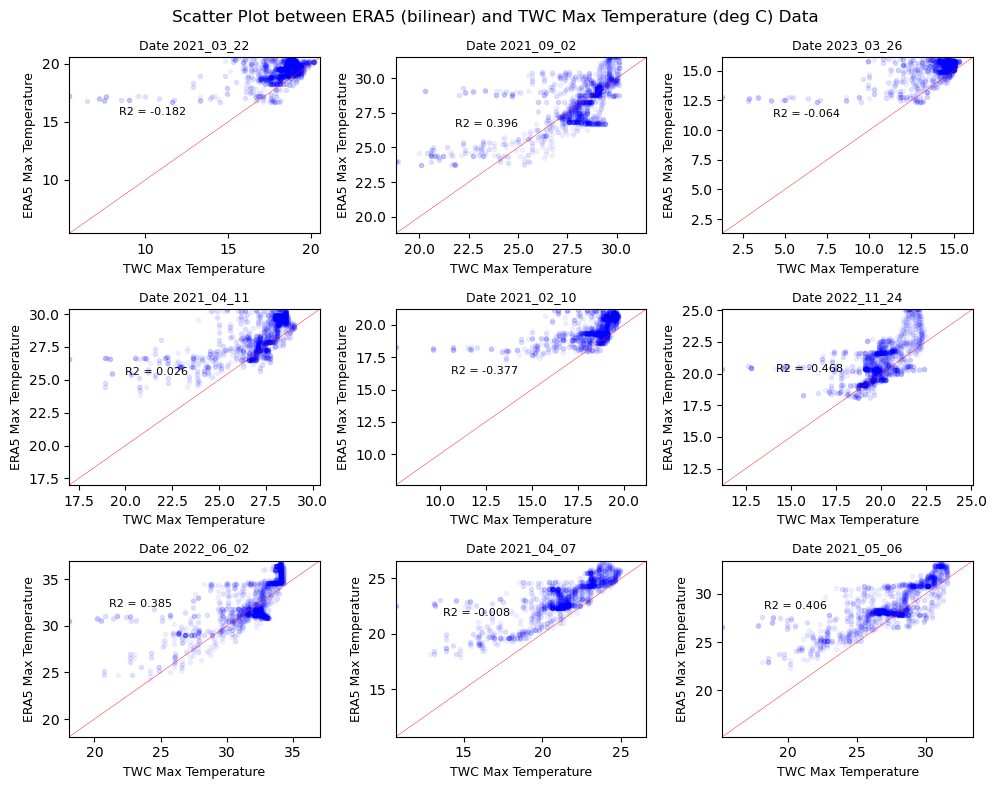

In [22]:
plot_dated_images_scatter(images_list_data1=selected_twc_max_temp, 
                                  images_list_data2=selected_era5_max_temp_bilinear, num_cols=3, figsize=(10, 8), 
                                  title='Scatter Plot between ERA5 (bilinear) and TWC Max Temperature (deg C) Data',
                                  xlabel='TWC Max Temperature', ylabel= 'ERA5 Max Temperature')

__Here, we see some positive R2 value between TWC and ERA5 maximum temperature. This seems promising for ML/DL modeling. Based on the scatter plots of TWC and ERA5 `max_temperature`, it seems like `max_temperature` of TWC and ERA5 are very correlated and the proposed ML framework might do very well in downscaling ERA5 temperature using TWC temperature as training data.__

-------------------------

# 2. Correlation between TWC and ERA5 `Total Precipitation`

Here, we will try to see if there is any correlation between TWC and ERA5 total precipitation data for some random dates. 


#### unit mm

In [23]:
twc_total_precip_datasets = glob(os.path.join('../../datasets/weather_raster_data/counties_California/twc_data/total_precip', '*tif'))
# randomized_twc_total_precip = np.random.choice(twc_total_precip_datasets, size=9) # choosing #n daasets randomly 
# randomized_twc_total_precip
selected_twc_total_precip = ['../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20210925.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20210623.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20220925.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20220727.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20220717.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20220124.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20210609.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20220704.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20221112.tif']
selected_twc_total_precip

['../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20210925.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20210623.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20220925.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20220727.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20220717.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20220124.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20210609.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20220704.tif',
 '../../datasets/weather_raster_data/counties_California/twc_data/total_precip/total_precip_20221112.tif']

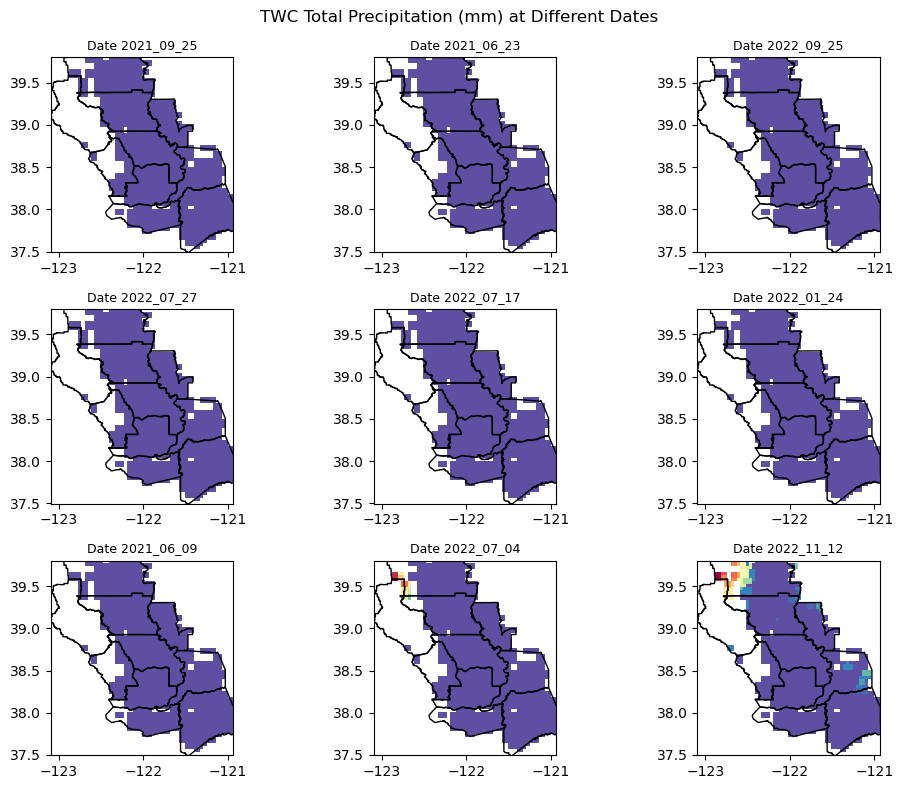

In [25]:
plot_dated_images_rasters(list_of_images=list(selected_twc_total_precip), num_cols=3, figsize=(10, 8), 
            shapefile='../shapefiles_grids/selected_counties_California.shp', title='TWC Total Precipitation (mm) at Different Dates')

### ERA5 Total Precipitation (bilinear)

In [26]:
selected_era5_total_precip_bilinear =  ['../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/total_precip/total_precip_20210925.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/total_precip/total_precip_20210623.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/total_precip/total_precip_20220925.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/total_precip/total_precip_20220727.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/total_precip/total_precip_20220717.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/total_precip/total_precip_20220124.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/total_precip/total_precip_20210609.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/total_precip/total_precip_20220704.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/total_precip/total_precip_20221112.tif']

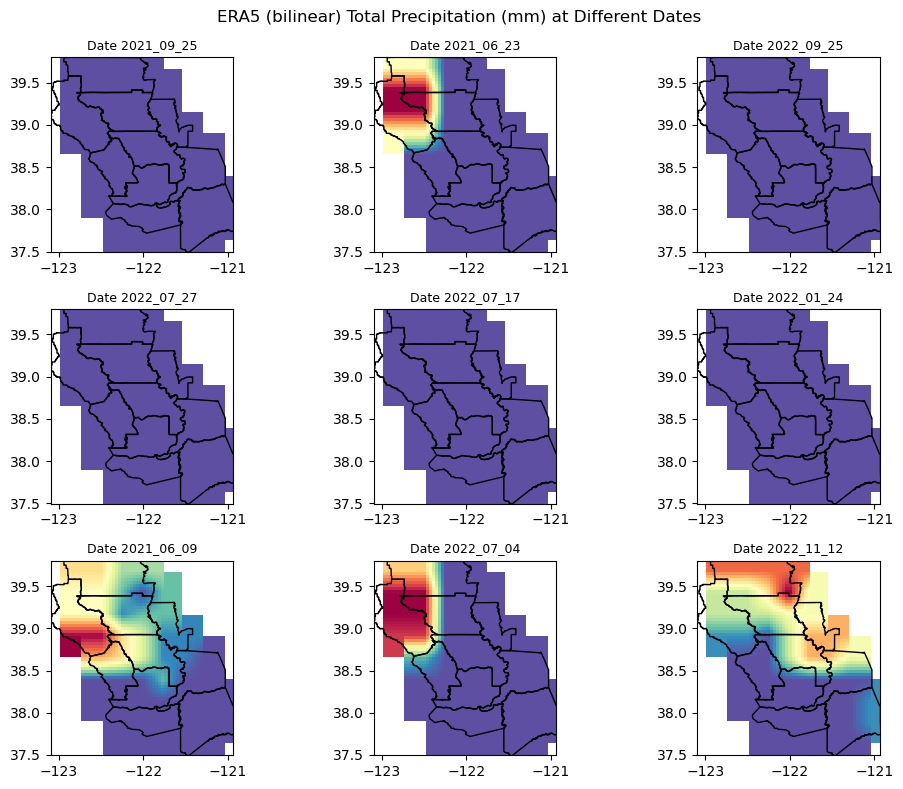

In [27]:
plot_dated_images_rasters(list_of_images=list(selected_era5_total_precip_bilinear), num_cols=3, figsize=(10, 8), 
                                  shapefile='../shapefiles_grids/selected_counties_California.shp', 
                                  title='ERA5 (bilinear) Total Precipitation (mm) at Different Dates')

/tmp/ipykernel_23084/1766551877.py:84: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax[row, col].set_xlim(minx, maxx)
/tmp/ipykernel_23084/1766551877.py:85: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax[row, col].set_ylim(miny, maxx)
/tmp/ipykernel_23084/1766551877.py:84: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax[row, col].set_xlim(minx, maxx)
/tmp/ipykernel_23084/1766551877.py:85: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax[row, col].set_ylim(miny, maxx)
/tmp/ipykernel_23084/1766551877.py:84: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax[row, col].set_xlim(minx, maxx)
/tmp/ipykernel_23084/1766551877.py:85: UserWa

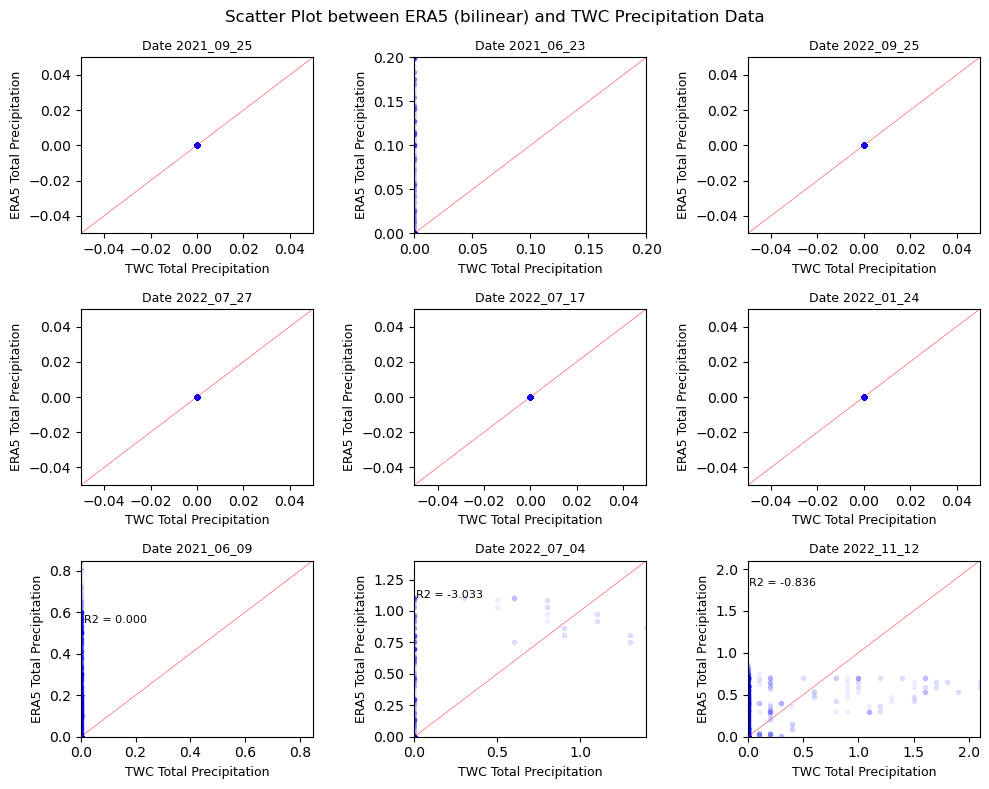

In [28]:
plot_dated_images_scatter(images_list_data1=selected_twc_total_precip, 
                                  images_list_data2=selected_era5_total_precip_bilinear, 
                                  num_cols=3, figsize=(10, 8), 
                                  title='Scatter Plot between ERA5 (bilinear) and TWC Precipitation Data',
                                  xlabel='TWC Total Precipitation', ylabel= 'ERA5 Total Precipitation')

### Insights
- For both max_temperature and total_precipitation, bilinearly resampled ERA5 data have better `R2` relationship with TWC data, so it's best if we use `bilinearly` interpolated/resampled ERA5 data as predictors. 
- Based on the scatter plot of TWC and ERA5 `total_precipitation` scatter plots, it seems like ERA5 and TWC total_precipitation don't have good `R2` correlation, meaning the ML framework using ERA5 precip as predictors and TWC precip as training data might not work well. R2 performance for ERA5 bilinear resampling does a little better.

-------------------

# 3. Correlation between TWC and ERA5 `Average Wind Speed`

Here, we will try to see if there is any correlation between TWC and ERA5 average wind speed data for some random dates. For plotting the ERA5 values with TWC 4km resolution data, ERA5 dataset has been resampled to 4km resolution using `Biliner Resampling`.


#### unit km/h

In [43]:
selected_era5_wind_speed =  ['../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_wind_speed/avg_wind_speed_20210925.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_wind_speed/avg_wind_speed_20210623.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_wind_speed/avg_wind_speed_20220925.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_wind_speed/avg_wind_speed_20220727.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_wind_speed/avg_wind_speed_20220717.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_wind_speed/avg_wind_speed_20220124.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_wind_speed/avg_wind_speed_20210609.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_wind_speed/avg_wind_speed_20220704.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_wind_speed/avg_wind_speed_20221112.tif']

selected_twc_wind_speed =  ['../../datasets/weather_raster_data/counties_California/twc_data/avg_wind/avg_wind_20210925.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_wind/avg_wind_20210623.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_wind/avg_wind_20220925.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_wind/avg_wind_20220727.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_wind/avg_wind_20220717.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_wind/avg_wind_20220124.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_wind/avg_wind_20210609.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_wind/avg_wind_20220704.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_wind/avg_wind_20221112.tif']

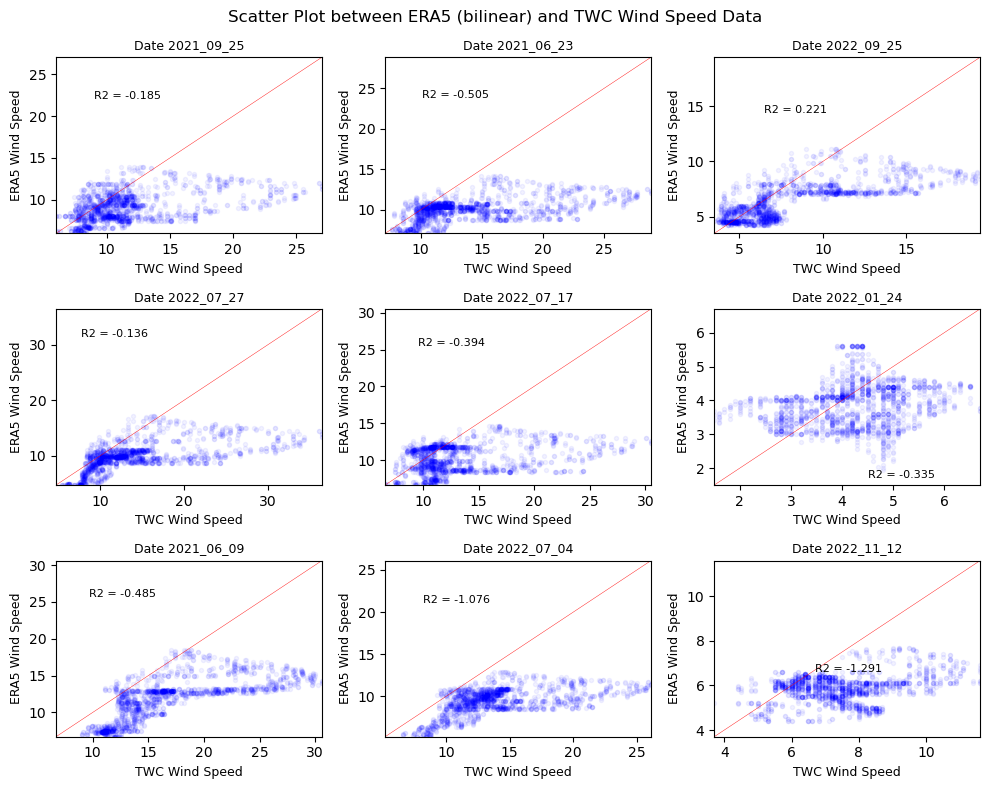

In [44]:
plot_dated_images_scatter(images_list_data1=selected_twc_wind_speed, 
                         images_list_data2=selected_era5_wind_speed, 
                                  num_cols=3, figsize=(10, 8), 
                                  title='Scatter Plot between ERA5 (bilinear) and TWC Wind Speed Data',
                                  xlabel='TWC Wind Speed', ylabel= 'ERA5 Wind Speed')

__Here, we see mostly negative R2 value between TWC and ERA5 average wind speed. Still, it is worth investigating whether ML/DL model can improve this correlation by increasing spatial resolution (improving values) of ERA5 average wind speed data.__

------------------

# 4. Correlation between TWC and ERA5 `Average Relative Humidity`

Here, we will try to see if there is any correlation between TWC and ERA5 Average Relative Humidity data for some random dates.  For plotting the ERA5 values with TWC 4km resolution data, ERA5 dataset has been resampled to 4km resolution using `Biliner Resampling`.


###### unit %

In [45]:
selected_era5_avg_rhumid =  ['../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_Rhumid/avg_Rhumid_20210925.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_Rhumid/avg_Rhumid_20210623.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_Rhumid/avg_Rhumid_20220925.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_Rhumid/avg_Rhumid_20220727.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_Rhumid/avg_Rhumid_20220717.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_Rhumid/avg_Rhumid_20220124.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_Rhumid/avg_Rhumid_20210609.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_Rhumid/avg_Rhumid_20220704.tif',
       '../../datasets/weather_raster_data/counties_California/era5_data/resampled_4km_rasters_bilinear/avg_Rhumid/avg_Rhumid_20221112.tif']

selected_twc_avg_rhumid =  ['../../datasets/weather_raster_data/counties_California/twc_data/avg_Rhumid/avg_Rhumid_20210925.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_Rhumid/avg_Rhumid_20210623.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_Rhumid/avg_Rhumid_20220925.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_Rhumid/avg_Rhumid_20220727.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_Rhumid/avg_Rhumid_20220717.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_Rhumid/avg_Rhumid_20220124.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_Rhumid/avg_Rhumid_20210609.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_Rhumid/avg_Rhumid_20220704.tif',
       '../../datasets/weather_raster_data/counties_California/twc_data/avg_Rhumid/avg_Rhumid_20221112.tif']

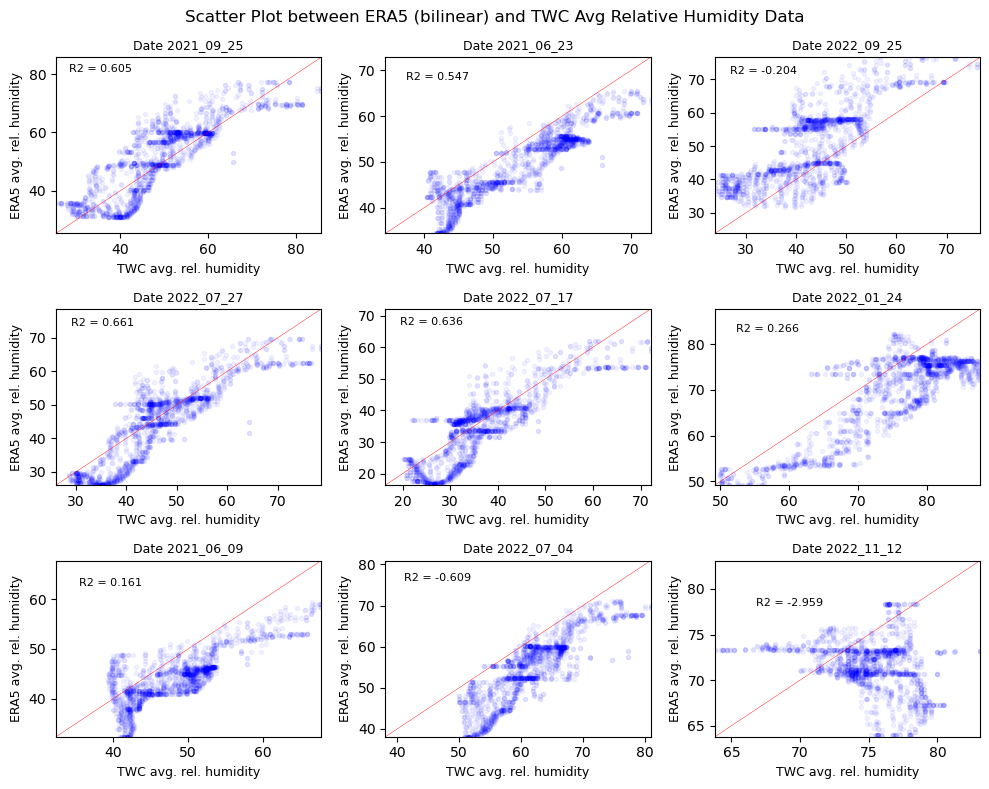

In [46]:
plot_dated_images_scatter(images_list_data1=selected_twc_avg_rhumid, 
                         images_list_data2=selected_era5_avg_rhumid, 
                                  num_cols=3, figsize=(10, 8), 
                                  title='Scatter Plot between ERA5 (bilinear) and TWC Avg Relative Humidity Data',
                                  xlabel='TWC avg. rel. humidity', ylabel= 'ERA5 avg. rel. humidity')

__Here, we see some positive R2 value between TWC and ERA5 average relative humidity. This seems promising for ML/DL modeling.__

----------------

# 5. Comparing ERA5 and SMAP L-band soil moisute data


In the framework, we didn't include 100m resolution SMAP L-band satellite soil moisture data due to data issue. The SMAP L-band satellite soil moisture data plotted here are only for 2022. Later when `Feng` gave me the SMAP L-band satellite soil moisture datasets from 2017, there were data issues in both soil moisture and land surface temperature data (detail discussion in `Exp_DA_satellite_data.ipynb` script). We could only use the land surface temperature data in the `100m ARD`.  For plotting the ERA5 values with satellite 100m resolution data, the ERA5 dataset has been maked and resampled to 100m resolution using `Biliner Resampling`.

__This comparison is only performed for `Woodland site` as satellite soil moisture data is only available for Woodland site in our ROI for the time being.__

### SMAP data

In [117]:
smap_soil_moisture_datasets = glob(os.path.join('../../datasets/satellite_raster_data/Woodland/soil_moisture_woodland_harmonized', '*tif'))
# randomized_smap_sm = np.random.choice(smap_soil_moisture_datasets, size=15) # choosing #n daasets randomly 
# randomized_smap_sm
selected_smap_sm_datasets = ['../../datasets/satellite_raster_data/Woodland/soil_moisture_woodland_harmonized/NWD2_CAWO_Tomato_20220215.tif',
       '../../datasets/satellite_raster_data/Woodland/soil_moisture_woodland_harmonized/NWD2_CAWO_Tomato_20220310.tif',
       '../../datasets/satellite_raster_data/Woodland/soil_moisture_woodland_harmonized/NWD2_CAWO_Tomato_20220430.tif',
       '../../datasets/satellite_raster_data/Woodland/soil_moisture_woodland_harmonized/NWD2_CAWO_Tomato_20220601.tif',
       '../../datasets/satellite_raster_data/Woodland/soil_moisture_woodland_harmonized/NWD2_CAWO_Tomato_20220609.tif',
       '../../datasets/satellite_raster_data/Woodland/soil_moisture_woodland_harmonized/NWD2_CAWO_Tomato_20221213.tif',
       '../../datasets/satellite_raster_data/Woodland/soil_moisture_woodland_harmonized/NWD2_CAWO_Tomato_20221114.tif',
       '../../datasets/satellite_raster_data/Woodland/soil_moisture_woodland_harmonized/NWD2_CAWO_Tomato_20220103.tif',
       '../../datasets/satellite_raster_data/Woodland/soil_moisture_woodland_harmonized/NWD2_CAWO_Tomato_20221108.tif']

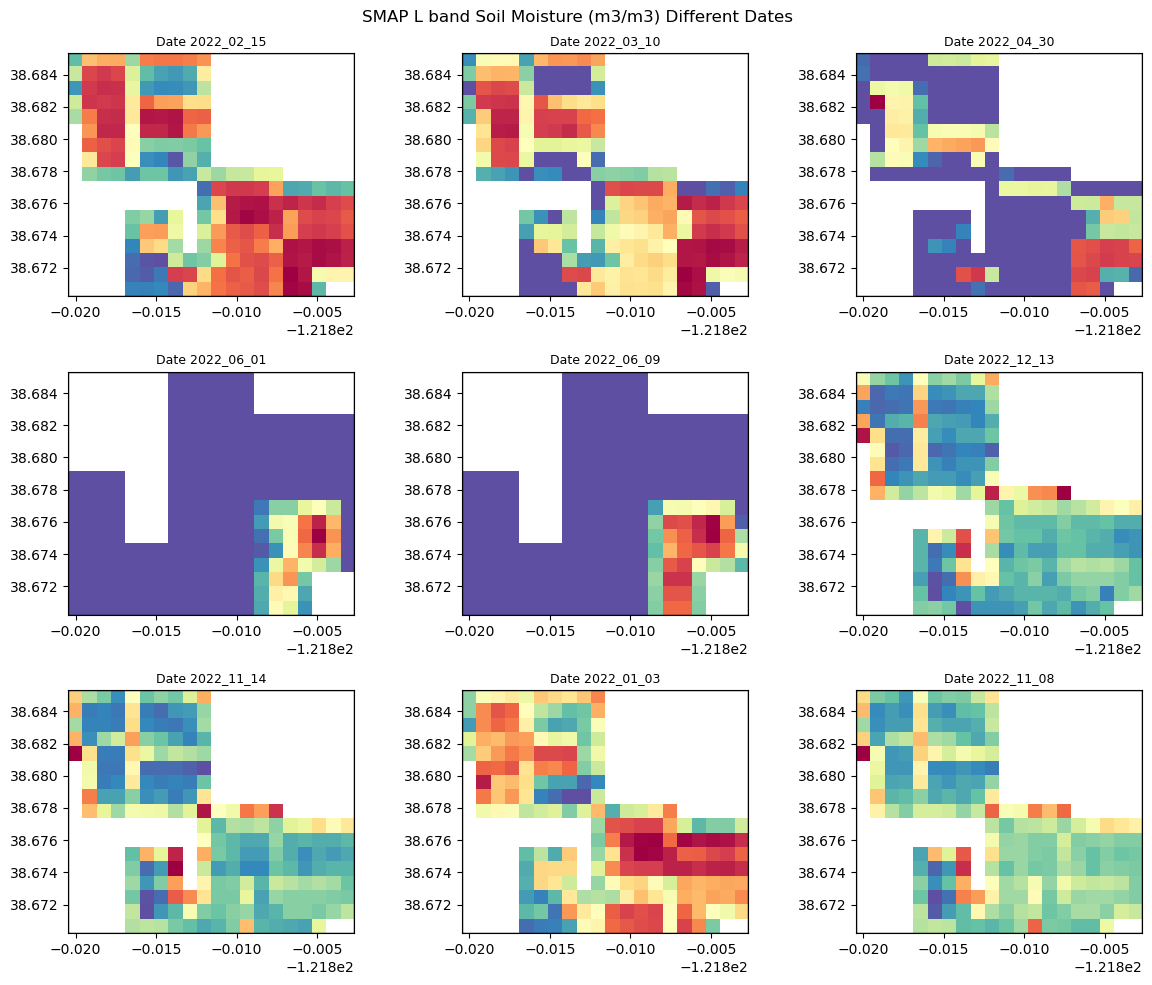

In [118]:
plot_dated_images_rasters(list_of_images=selected_smap_sm_datasets, num_cols=3, figsize=(12, 10), 
            shapefile='../shapefiles_grids/Woodland_bbox.shp', 
                          title='SMAP L band Soil Moisture (m3/m3) Different Dates')

__For some dates, there seem to be no data coverage in some parts of the Woodland site. Discussed with `Feng`. Not sure why this is happening. May be an issue with data source.__

### ERA5 Soil Moisture Level 1 Data

In [119]:
selected_era5_sm_datasets = ['../../datasets/weather_raster_data/Woodland/era5_data/maksed_100m_rasters/avg_SM_L1/avg_SM_L1_20220215.tif',
                 '../../datasets/weather_raster_data/Woodland/era5_data/maksed_100m_rasters/avg_SM_L1/avg_SM_L1_20220310.tif',
                 '../../datasets/weather_raster_data/Woodland/era5_data/maksed_100m_rasters/avg_SM_L1/avg_SM_L1_20220430.tif',
                 '../../datasets/weather_raster_data/Woodland/era5_data/maksed_100m_rasters/avg_SM_L1/avg_SM_L1_20220601.tif',
                 '../../datasets/weather_raster_data/Woodland/era5_data/maksed_100m_rasters/avg_SM_L1/avg_SM_L1_20220609.tif',
                 '../../datasets/weather_raster_data/Woodland/era5_data/maksed_100m_rasters/avg_SM_L1/avg_SM_L1_20221213.tif',
                '../../datasets/weather_raster_data/Woodland/era5_data/maksed_100m_rasters/avg_SM_L1/avg_SM_L1_20221114.tif',
                '../../datasets/weather_raster_data/Woodland/era5_data/maksed_100m_rasters/avg_SM_L1/avg_SM_L1_20220103.tif',
                '../../datasets/weather_raster_data/Woodland/era5_data/maksed_100m_rasters/avg_SM_L1/avg_SM_L1_20221108.tif']

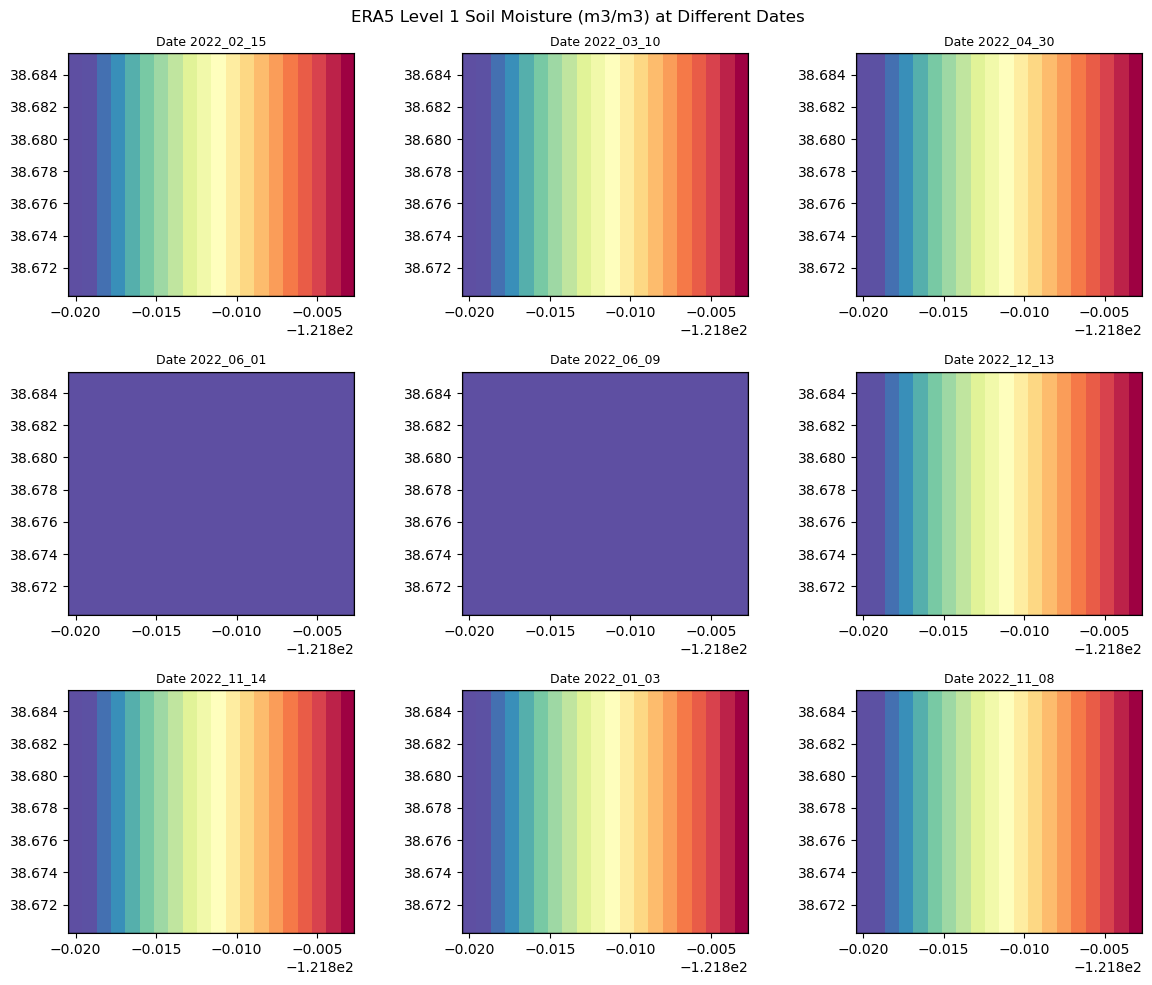

In [120]:
plot_dated_images_rasters(list_of_images=selected_era5_sm_datasets, num_cols=3, figsize=(12, 10), 
            shapefile='../shapefiles_grids/Woodland_bbox.shp', 
                          title='ERA5 Level 1 Soil Moisture (m3/m3) at Different Dates')

### SMAP  & ERA5 soil moisture comparison

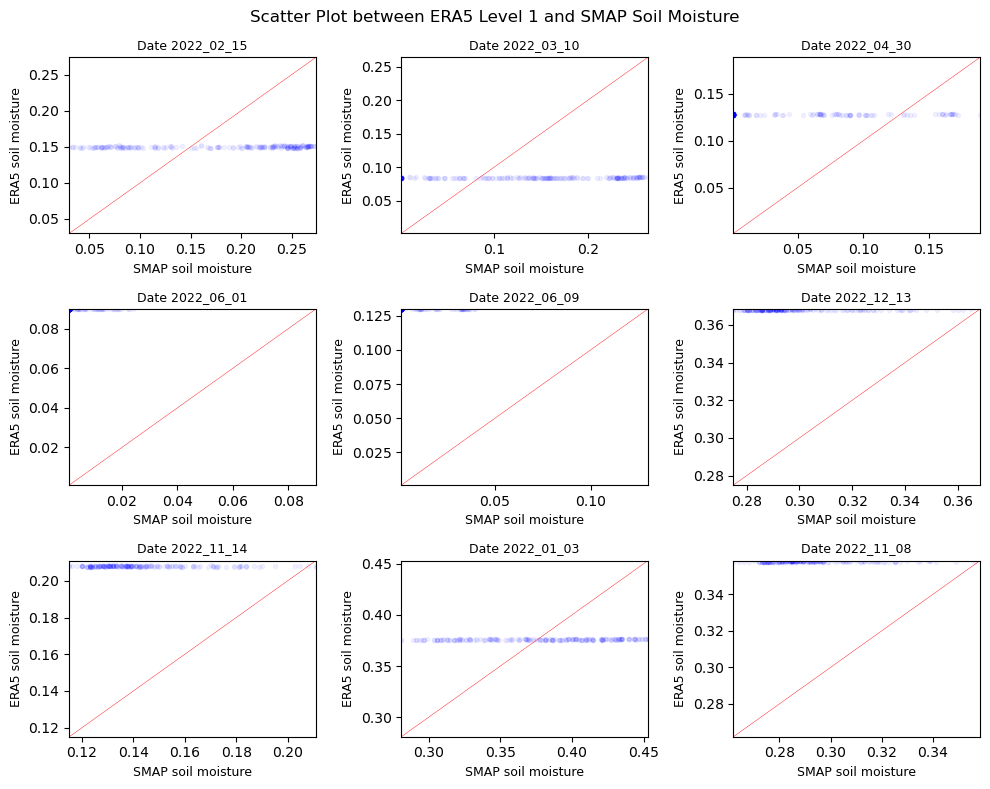

In [122]:
plot_dated_images_scatter(images_list_data1=selected_smap_sm_datasets, 
                         images_list_data2=selected_era5_sm_datasets, 
                                  num_cols=3, figsize=(10, 8), 
                                  title='Scatter Plot between ERA5 Level 1 and SMAP Soil Moisture',
                                  xlabel='SMAP soil moisture', ylabel= 'ERA5 soil moisture')

__The scatter plots show no correlation between ERA5 soil mositure and satellite SMAP L-Band soil moisture datasets. With varying values of satellite soil moisture, the ERA5 soil moisture values remain nearly the same.__